# Figs/Movie of SST/Surface Velocities/TCC

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

In [3]:
#link = "gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr-v2"
#link1 = "gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr"
ex_link = "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2"

era5 = xr.open_zarr(ex_link, chunks={'time': 48},consolidated=True,)
#era = xr.open_zarr(link1, chunks={'time': 48},consolidated=True,)

In [4]:
era5

<xarray.Dataset>
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 90.0...
  * level                                             (level) int64 1 2 ... 1000
  * longitude                                         (longitude) float32 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

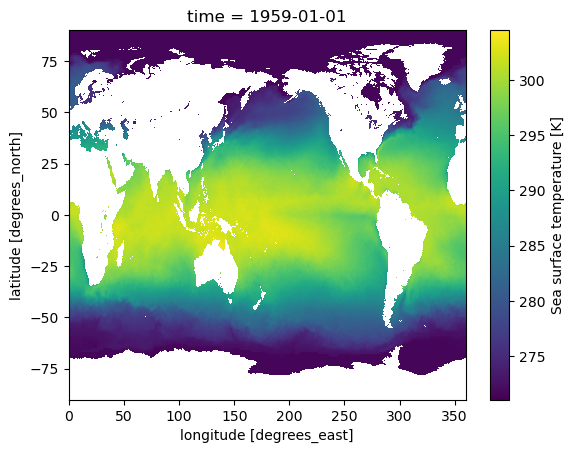

In [16]:
era5.sea_surface_temperature[0].plot()

In [ ]:
360-98

In [18]:
360-81.3

278.7

In [7]:
gom = dict(longitude=slice(278.7, 329), latitude=slice(31, 17.5))

In [9]:
sst = era5.sea_surface_temperature.sel(**gom) - 273.15
tcc = era5.total_cloud_cover.sel(**gom)
gp = era5.geopotential_at_surface.sel(**gom)

In [11]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(10)
client = cluster.get_client()

ModuleNotFoundError: No module named 'dask_gateway'

In [ ]:
client

In [ ]:
sst[0].plot()